In [1]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import accuracy_score

In [2]:
X, y = make_classification(n_samples=1000, n_features=2, n_informative=2,
                           n_redundant=0, random_state=42)
scaler = StandardScaler()
X = scaler.fit_transform(X)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [3]:
class LogisticRegressionNadam:
    def __init__(self, learning_rate=0.01, beta1=0.9, beta2=0.999, epsilon=1e-8, epochs=1000):
        self.lr = learning_rate
        self.beta1 = beta1
        self.beta2 = beta2
        self.epsilon = epsilon
        self.epochs = epochs

    def sigmoid(self, z):
        return 1 / (1 + np.exp(-z))

    def initialize(self, n_features):
        self.weights = np.zeros(n_features)
        self.bias = 0
        self.m_w = np.zeros(n_features)
        self.v_w = np.zeros(n_features)
        self.m_b = 0
        self.v_b = 0

    def compute_loss(self, y, y_pred):
        eps = 1e-8
        return -np.mean(y * np.log(y_pred + eps) + (1 - y) * np.log(1 - y_pred + eps))

    def fit(self, X, y):
        n_samples, n_features = X.shape
        self.initialize(n_features)
        self.losses = []

        for t in range(1, self.epochs + 1):
            linear_model = np.dot(X, self.weights) + self.bias
            y_pred = self.sigmoid(linear_model)

            # Gradients
            dw = np.dot(X.T, (y_pred - y)) / n_samples
            db = np.mean(y_pred - y)

            # Update biased moments
            self.m_w = self.beta1 * self.m_w + (1 - self.beta1) * dw
            self.v_w = self.beta2 * self.v_w + (1 - self.beta2) * (dw ** 2)
            self.m_b = self.beta1 * self.m_b + (1 - self.beta1) * db
            self.v_b = self.beta2 * self.v_b + (1 - self.beta2) * (db ** 2)

            # Bias correction
            m_w_hat = self.m_w / (1 - self.beta1 ** t)
            v_w_hat = self.v_w / (1 - self.beta2 ** t)
            m_b_hat = self.m_b / (1 - self.beta1 ** t)
            v_b_hat = self.v_b / (1 - self.beta2 ** t)

            # Nesterov lookahead gradient
            m_w_nesterov = self.beta1 * m_w_hat + (1 - self.beta1) * dw / (1 - self.beta1 ** t)
            m_b_nesterov = self.beta1 * m_b_hat + (1 - self.beta1) * db / (1 - self.beta1 ** t)

            self.weights -= self.lr * m_w_nesterov / (np.sqrt(v_w_hat) + self.epsilon)
            self.bias -= self.lr * m_b_nesterov / (np.sqrt(v_b_hat) + self.epsilon)

            # Track loss
            loss = self.compute_loss(y, y_pred)
            self.losses.append(loss)

    def predict(self, X):
        y_pred = self.sigmoid(np.dot(X, self.weights) + self.bias)
        return (y_pred >= 0.5).astype(int)

In [4]:
model = LogisticRegressionNadam(learning_rate=0.01, epochs=1000)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)

In [6]:
accuracy

0.88

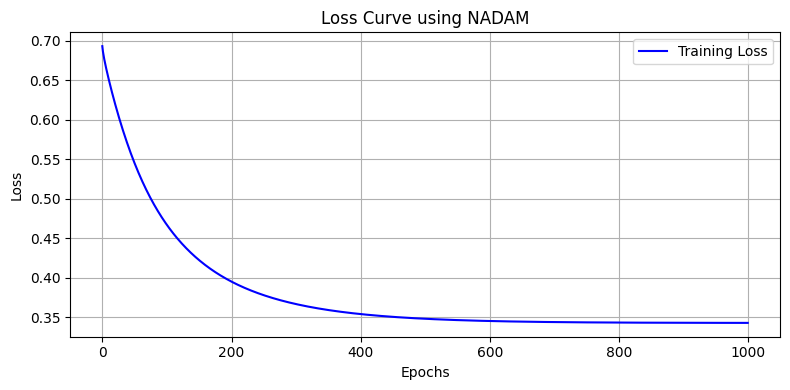

In [7]:
plt.figure(figsize=(8, 4))
plt.plot(model.losses, label="Training Loss", color="blue")
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.title("Loss Curve using NADAM")
plt.legend()
plt.grid(True)
plt.tight_layout()
plt.show()